<a href="https://colab.research.google.com/github/saif-byte/DataSciencePortfolio/blob/main/fashion_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classifying the clothes and accessories images

In this project we will load the dataset from tensorflow library and predict the image with the help of a keras model. We will classify each image into one out of 10 categories.

In [31]:
#importing necessary libraries
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

##Data Reading

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels) ,(test_images,test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
#we have 60000 images that are made of 28x28 pixels

In [9]:
#let us look for the labels in our dataset
train_labels[:10]


array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [11]:
#we can see that we have 10 types of wearinngs in our dataset 0 to 9

In [12]:
class_names = ['Tshirt' , 'Trouser' , 'Pullover' , 'Dress' , 'Coat' , 'Sandal' ,'Shirt' , 'Sneaker' , 'Bag' , 'Ankle boot']

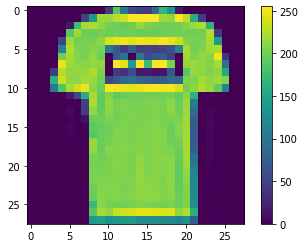

In [13]:
#let us look how some of our images look like
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()


###Data Preprocessing

In [14]:
#we will make all of our pixels data to be in between 0 to 1
train_images = train_images/255
test_images = test_images/255


###Training our model

In [17]:
model = keras.Sequential(
   [ keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128 , activation = 'relu') , 
    keras.layers.Dense(10 , activation = 'softmax')] )


In [20]:
model.compile(optimizer = 'adam' , 
              loss = 'sparse_categorical_crossentropy' ,
              metrics = ['accuracy'])

In [21]:
model.fit(train_images , train_labels , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5018 - accuracy: 0.8233
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3777 - accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3389 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3139 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2960 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2816 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2689 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2586 - accuracy: 0.9057
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2494 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.241

###Evaluating the model

In [22]:
test_loss , test_accuracy = model.evaluate(test_images  , test_labels , verbose = 1)
print(f'Test Accuracy : {test_accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3454 - accuracy: 0.8826
Test Accuracy : 0.8826000094413757


In [23]:
#our model is overfitting so we can tune the number of epochs
for e in [1,5,10,15]:
  model.fit(train_images , train_labels , epochs = e)
  test_loss , test_accuracy = model.evaluate(test_images  , test_labels , verbose = 1)
  print(f'Test Accuracy : {test_accuracy} Epochs = {e}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3390 - accuracy: 0.8849
Test Accuracy : 0.8848999738693237 Epochs = 1
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2247 - accuracy: 0.9151
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2182 - accuracy: 0.9178
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2120 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2073 - accuracy: 0.9225
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3451 - accuracy: 0.8851
Test Accuracy : 0.8851000070571899 Epochs = 5
Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1940 - accuracy: 0.9276
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1894 - accuracy: 0.9288
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1828 - accuracy: 0.9314
Epoch 4/10

In [25]:
#we can see that changing the epochs is not helping so we will go with epochs  =10
model.fit(train_images , train_labels , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1112 - accuracy: 0.9585
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1105 - accuracy: 0.9581
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1088 - accuracy: 0.9592
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1077 - accuracy: 0.9590
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1035 - accuracy: 0.9618
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1015 - accuracy: 0.9620
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1015 - accuracy: 0.9617
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0966 - accuracy: 0.9635
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0969 - accuracy: 0.9638
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.097

In [26]:
#now we will predict with the help of our model
prediction = model.predict(test_images)

In [28]:
#now let us see what our predictiona are
prediction

array([[2.19683405e-23, 1.06820829e-22, 2.29665359e-26, ...,
        3.21414831e-07, 1.23804300e-21, 9.99999642e-01],
       [2.69134762e-05, 5.40636852e-18, 9.99968529e-01, ...,
        2.61396119e-32, 6.94477164e-19, 3.79547730e-33],
       [1.14370300e-27, 1.00000000e+00, 2.26204637e-28, ...,
        0.00000000e+00, 3.20000557e-34, 9.18511254e-35],
       ...,
       [7.73372685e-12, 2.72107749e-34, 4.12741672e-12, ...,
        2.06498464e-18, 1.00000000e+00, 0.00000000e+00],
       [8.59889752e-23, 1.00000000e+00, 2.74915133e-21, ...,
        1.00205747e-24, 1.44208302e-23, 9.27232824e-32],
       [8.71668189e-14, 3.60920696e-15, 8.85394854e-18, ...,
        1.02514025e-06, 1.02034484e-07, 1.04142623e-11]], dtype=float32)

Ankle boot


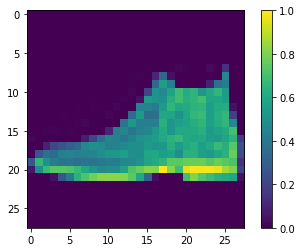

In [29]:
#we can see that for each image the liklihood of an image into a specific class is predicted. Now let us see if it correctly predicted
print(class_names[np.argmax(prediction[0])])
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


Bag


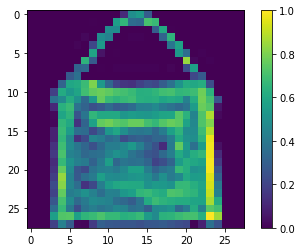

In [30]:
#we can see that our model correctly predicted the image.
#let us look another image
print(class_names[np.argmax(prediction[721])])
plt.figure()
plt.imshow(test_images[721])
plt.colorbar()
plt.grid(False)
plt.show()

In this project , we have trained our model using keras, we checked our model for different number of epochs and pick the one with best accuracy score on test set. This model can be used to identify type of clothes and accessories being uploaded to an ecommerce website.